In [1]:
import time # necessary to time the algorithms
import numpy as np
import copy # to keep the order of the values in every array loop after loop
import matplotlib.pyplot as plt
import pandas as pd # to create a dataframe and output a table

inputSizes = {} # Create a dictionary to generate the arrays for every input size   
ns = [100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000,12000,15000] # Modification in cell 8 as well
ns = np.array(ns) # Declare ns as an numpy array so that I can select the values to be shown on the x axis of the plot
for i in ns:
    inputSizes['n={}'.format(i)]=np.random.randint(1000, size=i)

In [2]:
# 1st sorting algorithm:                
def insertionSort(alist):
    for index in range(1,len(alist)): # loop to iterate through the whole list element by element starting from index 1

        currentvalue = alist[index] # starts from index 1
        position = index                                                                                          
                                                             # keeps comparing until the value checked is greater than 
        while position>0 and alist[position-1]>currentvalue: # the one at one index lower 
            alist[position]=alist[position-1] # their values are transferred from right to left
            position = position-1 
        
        alist[position]=currentvalue # value transfered from left to right
        

# 2nd sorting algorithm: 
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Creates a new list with the left half  
        R = arr[mid:] # New array with the right half 
  
        mergeSort(L) # Recursive call to sort the left halves
        mergeSort(R) # Recursive call to sort the right halves
  
        i = j = k = 0 # this variables represent list indexes to later on compare list elements to sort
          
        
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: # elements comparison
                arr[k] = L[i] # transfer the values to the new arrays 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # To make sure all the elements were considered
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1



# 3rd sorting algorithm: 
def counting_sort(alist, largest):
    c = [0]*(largest + 1) # Creates a list of zeros whose length = max value of the problem array +1
    for i in range(len(alist)): # +1 to the values in list c at the indexes equivalent to each of the values from 
        c[alist[i]] = c[alist[i]] + 1                                                         # the problem array
 
    # Find the last index for each element
    c[0] = c[0] - 1 # -1 to the value at index 0 of the new list created
    for i in range(1, largest + 1):
        c[i] = c[i] + c[i - 1] # From index 1 to the right, it adds up the current value at every index and the one before
 
    result = [None]*len(alist) # Created an list with None values with the same lenght as the problem array
 
    # Creating the sorted array: takes the values from the end of the problem array and uses them as indexes for list c.
    # The value that hold the elements from list c are taken as the indexes of the final list where the original 
    for x in reversed(alist):                                            # values from the problem array should be placed.
        result[c[x]] = x
        c[x] = c[x] - 1
 
    return result


# 4th sorting algorithm: 

def cycleSort(array): 
  writes = 0
    
  # Iteration along the list to find cycles to rotate. 
  for cycleStart in range(0, len(array) - 1): 
    item = array[cycleStart] 
      
    # Find where to put the item. 
    pos = cycleStart 
    for i in range(cycleStart + 1, len(array)): 
      if array[i] < item: 
        pos += 1
      
    # when the item is where it should be located a new cycle starts 
    if pos == cycleStart: 
      continue
      
    # Otherwise, put the item there or right after any duplicates. 
    while item == array[pos]: 
      pos += 1 # then it should be moved one more position at this point
    array[pos], item = item, array[pos] # updates the final location of the item in question
    writes += 1
      
    # Rotate the rest of the cycle. 
    while pos != cycleStart: 
        
      # Find where to put the item. 
      pos = cycleStart 
      for i in range(cycleStart + 1, len(array)): 
        if array[i] < item: # then it should be moved one more position at this point
          pos += 1
        
      while item == array[pos]: 
        pos += 1 # then it should be moved one more position at this point
      array[pos], item = item, array[pos] # updates the final location of the item in question
      writes += 1
    
  return writes

# 5th sorting algorithm: 
def gnomeSort( arr, n): 
    index = 0
    while index < n: # keeps looping until the greatest index of the list problem 
        if index == 0: # only tests true the first time
            index = index + 1
        if arr[index] >= arr[index - 1]: # compares two elements
            index = index + 1
        else: 
            arr[index], arr[index-1] = arr[index-1], arr[index] # swaps their value
            index = index - 1 
  
    return arr

In [3]:
# loop to just warm up the CPU before timing the algorithms. Not involved in this project in any other way
for i in range (300):
    x = np.random.randint(1000, size=1000)
    counting_sort(x, max(x))

In [4]:
# Arrays that will hold the values of the execution time. One array per algorithm
al1, al2, al3, al4, al5 = [],[],[],[],[]

# Iteration through the dictionary that holds the arrays to sort
for key, value in inputSizes.items():
    
    num_runs = 10
    # 10 loops per input size in which every algorithm is timed and the value appended to its corresponding array
    for i in range(num_runs):
    
        # timing 1st algorithm:
        # copy.deepcopy makes a true copy of the array keeping its original order execution after execution. Leaving it out 
        # would just be a reference to the original array but after the first sorting execution it would be passed to the 
        # algorithms already sorted
        originalValue = copy.deepcopy(value) 
        startTime = time.time()
        insertionSort(originalValue)
        endTime = time.time()
        timeElapsed = endTime - startTime
        al1.append(timeElapsed)
        
        #timing 2nd algorithm
        originalValue = copy.deepcopy(value) 
        startTime = time.time()
        mergeSort(originalValue)
        endTime = time.time()
        timeElapsed = endTime - startTime
        al2.append(timeElapsed)
        
        #timing 3rd algorithm
        originalValue = copy.deepcopy(value)
        startTime = time.time()
        counting_sort(originalValue, max(originalValue))
        endTime = time.time()
        timeElapsed = endTime - startTime
        al3.append(timeElapsed)
        
        #timing 4th algorithm
        originalValue = copy.deepcopy(value) 
        startTime = time.time()
        cycleSort(originalValue)
        endTime = time.time()
        timeElapsed = endTime - startTime
        al4.append(timeElapsed)
        
        #timing 5th algorithm
        originalValue = copy.deepcopy(value)  
        startTime = time.time()
        gnomeSort(originalValue, len(originalValue))
        endTime = time.time()
        timeElapsed = endTime - startTime
        al5.append(timeElapsed)
          

In [5]:
# Dictionary to store the average execution time per input size separately
avgTimes = {} 
n = 0
for x in range(1,16): # Range is the number of input sizes
    avgTimes['al1n{}'.format(x)]=np.mean(al1[n:n+10])
    avgTimes['al2n{}'.format(x)]=np.mean(al2[n:n+10])
    avgTimes['al3n{}'.format(x)]=np.mean(al3[n:n+10])
    avgTimes['al4n{}'.format(x)]=np.mean(al4[n:n+10])
    avgTimes['al5n{}'.format(x)]=np.mean(al5[n:n+10])
    n += 10

## TABLE

In [6]:
# Print the table by creating a dataframe with pandas:
pd.options.display.float_format = '{:,.3f}'.format # Format the values to take just 3 float numbers
# Fill cells with key:value pairs. Below, in data every key of inputSizes dictionary -column- is assigned to one 
# value per algorithm -row- (dictionaries are not indexed but somehow they have an order)
data = [{list(inputSizes.keys())[0]: avgTimes['al1n1'], list(inputSizes.keys())[1]: avgTimes['al1n2'],list(inputSizes.keys())[2]: avgTimes['al1n3'], list(inputSizes.keys())[3]: avgTimes['al1n4'], list(inputSizes.keys())[4]: avgTimes['al1n5'], list(inputSizes.keys())[5]: avgTimes['al1n6'], list(inputSizes.keys())[6]: avgTimes['al1n7'], list(inputSizes.keys())[7]: avgTimes['al1n8'], list(inputSizes.keys())[8]: avgTimes['al1n9'], list(inputSizes.keys())[9]: avgTimes['al1n10'], list(inputSizes.keys())[10]: avgTimes['al1n11'], list(inputSizes.keys())[11]: avgTimes['al1n12'], list(inputSizes.keys())[12]: avgTimes['al1n13'], list(inputSizes.keys())[13]: avgTimes['al1n14'], list(inputSizes.keys())[14]: avgTimes['al1n15']},{list(inputSizes.keys())[0]: avgTimes['al2n1'], list(inputSizes.keys())[1]: avgTimes['al2n2'],list(inputSizes.keys())[2]: avgTimes['al2n3'], list(inputSizes.keys())[3]: avgTimes['al2n4'], list(inputSizes.keys())[4]: avgTimes['al2n5'], list(inputSizes.keys())[5]: avgTimes['al2n6'], list(inputSizes.keys())[6]: avgTimes['al2n7'], list(inputSizes.keys())[7]: avgTimes['al2n8'], list(inputSizes.keys())[8]: avgTimes['al2n9'], list(inputSizes.keys())[9]: avgTimes['al2n10'], list(inputSizes.keys())[10]: avgTimes['al2n11'], list(inputSizes.keys())[11]: avgTimes['al2n12'], list(inputSizes.keys())[12]: avgTimes['al2n13'], list(inputSizes.keys())[13]: avgTimes['al2n14'], list(inputSizes.keys())[14]: avgTimes['al2n15']},{list(inputSizes.keys())[0]: avgTimes['al3n1'], list(inputSizes.keys())[1]: avgTimes['al3n2'],list(inputSizes.keys())[2]: avgTimes['al3n3'], list(inputSizes.keys())[3]: avgTimes['al3n4'], list(inputSizes.keys())[4]: avgTimes['al3n5'], list(inputSizes.keys())[5]: avgTimes['al3n6'], list(inputSizes.keys())[6]: avgTimes['al3n7'], list(inputSizes.keys())[7]: avgTimes['al3n8'], list(inputSizes.keys())[8]: avgTimes['al3n9'], list(inputSizes.keys())[9]: avgTimes['al3n10'], list(inputSizes.keys())[10]: avgTimes['al3n11'], list(inputSizes.keys())[11]: avgTimes['al3n12'], list(inputSizes.keys())[12]: avgTimes['al3n13'], list(inputSizes.keys())[13]: avgTimes['al3n14'], list(inputSizes.keys())[14]: avgTimes['al3n15']},{list(inputSizes.keys())[0]: avgTimes['al4n1'], list(inputSizes.keys())[1]: avgTimes['al4n2'],list(inputSizes.keys())[2]: avgTimes['al4n3'], list(inputSizes.keys())[3]: avgTimes['al4n4'], list(inputSizes.keys())[4]: avgTimes['al4n5'], list(inputSizes.keys())[5]: avgTimes['al4n6'], list(inputSizes.keys())[6]: avgTimes['al4n7'], list(inputSizes.keys())[7]: avgTimes['al4n8'], list(inputSizes.keys())[8]: avgTimes['al4n9'], list(inputSizes.keys())[9]: avgTimes['al4n10'], list(inputSizes.keys())[10]: avgTimes['al4n11'], list(inputSizes.keys())[11]: avgTimes['al4n12'], list(inputSizes.keys())[12]: avgTimes['al4n13'], list(inputSizes.keys())[13]: avgTimes['al4n14'], list(inputSizes.keys())[14]: avgTimes['al4n15']},{list(inputSizes.keys())[0]: avgTimes['al5n1'], list(inputSizes.keys())[1]: avgTimes['al5n2'],list(inputSizes.keys())[2]: avgTimes['al5n3'], list(inputSizes.keys())[3]: avgTimes['al5n4'], list(inputSizes.keys())[4]: avgTimes['al5n5'], list(inputSizes.keys())[5]: avgTimes['al5n6'], list(inputSizes.keys())[6]: avgTimes['al5n7'], list(inputSizes.keys())[7]: avgTimes['al5n8'], list(inputSizes.keys())[8]: avgTimes['al5n9'], list(inputSizes.keys())[9]: avgTimes['al5n10'], list(inputSizes.keys())[10]: avgTimes['al5n11'], list(inputSizes.keys())[11]: avgTimes['al5n12'], list(inputSizes.keys())[12]: avgTimes['al5n13'], list(inputSizes.keys())[13]: avgTimes['al5n14'], list(inputSizes.keys())[14]: avgTimes['al5n15']}]
# Set indexes:
df = pd.DataFrame(data, index=['Insertion Sort', 'Merge Sort', 'Counting Sort', 'Cycle sort', 'Gnome sort']) 
# Set specific column order, the defaul one doesn't suit:
df = df [[list(inputSizes.keys())[0],list(inputSizes.keys())[1],list(inputSizes.keys())[2],list(inputSizes.keys())[3],list(inputSizes.keys())[4],list(inputSizes.keys())[5],list(inputSizes.keys())[6],list(inputSizes.keys())[7],list(inputSizes.keys())[8],list(inputSizes.keys())[9],list(inputSizes.keys())[10],list(inputSizes.keys())[11],list(inputSizes.keys())[12],list(inputSizes.keys())[13],list(inputSizes.keys())[14]]] 
df

,n=100,n=250,n=500,n=750,n=1000,n=1250,n=2500,n=3750,n=5000,n=6250,n=7500,n=8750,n=10000,n=12000,n=15000
Insertion Sort,0.001,0.007,0.033,0.073,0.131,0.200,0.825,1.836,3.263,5.109,7.348,10.193,13.436,19.446,30.480
Merge Sort,0.000,0.001,0.004,0.005,0.008,0.010,0.022,0.035,0.049,0.061,0.075,0.090,0.103,0.128,0.161
Counting Sort,0.000,0.000,0.001,0.001,0.001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.010,0.012
Cycle sort,0.003,0.016,0.069,0.154,0.274,0.432,1.748,3.941,6.996,11.023,15.672,21.104,28.178,40.220,63.469
Gnome sort,0.003,0.021,0.085,0.191,0.340,0.512,2.095,4.664,8.268,12.980,18.676,25.455,33.888,49.006,76.762


## PLOTS

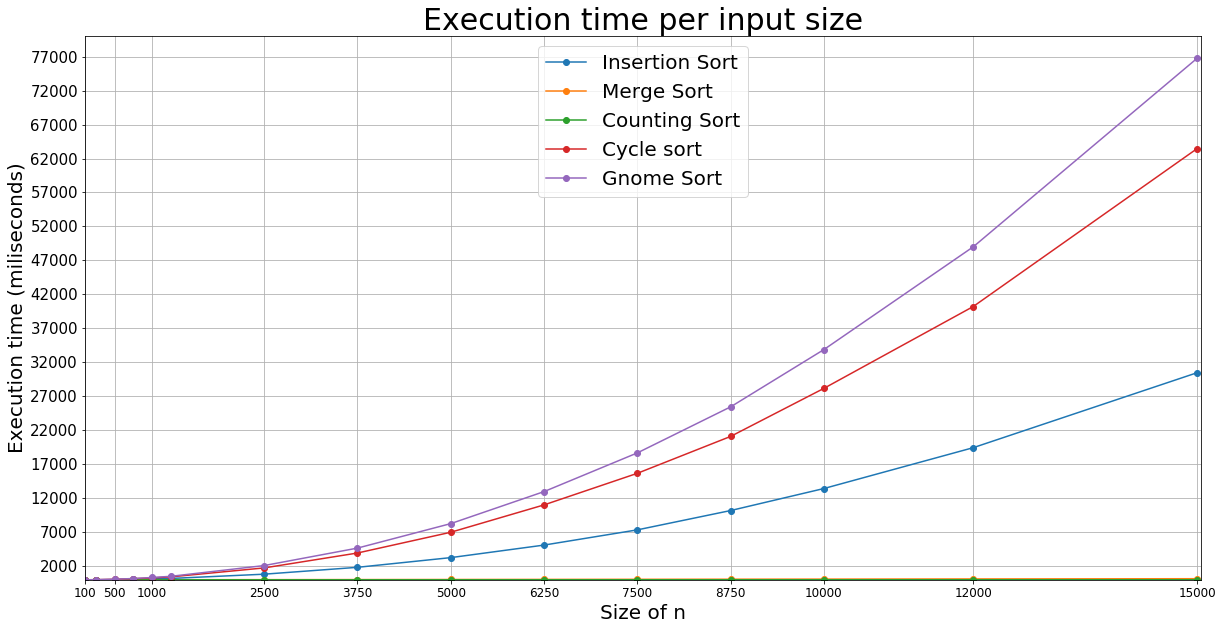

In [7]:
# Convert averages to miliseconds from a dictionary into an array
avgTimes_ms = []
for key,value in avgTimes.items():
    avgTimes_ms.append(value*1000)

# Separate every fifth value to group them per algorithm
y1 = [avgTimes_ms[x] for x in range(0, len(avgTimes_ms),5)]
y2 = [avgTimes_ms[x] for x in range(1, len(avgTimes_ms),5)]
y3 = [avgTimes_ms[x] for x in range(2, len(avgTimes_ms),5)]
y4 = [avgTimes_ms[x] for x in range(3, len(avgTimes_ms),5)]
y5 = [avgTimes_ms[x] for x in range(4, len(avgTimes_ms),5)]
x = ns


# PLOT general settings:
plt.figure(figsize=(20, 10)) # Set size of the plot
plt.yticks(np.arange(2000, 78000, step=5000), fontsize=15) # Set ticks on the y axis
plt.ylim(bottom=0,top=80000) # Set limit values on y axis
xtic_show=[0,2,4,6,7,8,9,10,11,12,13,14] # select the x ticks to show
plt.xticks(ns[xtic_show], fontsize=12) # Set x axis labels and their size
plt.xlim(left=100,right=15050) # first and last value on x axis
plt.xlabel('Size of n', fontsize=20) # x axis label
plt.ylabel('Execution time (miliseconds)', fontsize=20) # y axis label
plt.title('Execution time per input size', fontsize=30) # title of the plot

# PLOT data, overlap plot including x and y as well as adding '-o' to see lines with a dot per (x,y). Once per algorithm
plt.plot(x,y1,'-o', label='Insertion Sort') 
plt.plot(x,y2,'-o', label='Merge Sort')
plt.plot(x,y3,'-o', label='Counting Sort')
plt.plot(x,y4,'-o', label='Cycle sort')
plt.plot(x,y5,'-o', label='Gnome Sort')
plt.legend(prop={'size': 20}, loc=9) # legend size and location

plt.grid() # Add grid
plt.show()

### Zooming into the lowest portion of the plot:

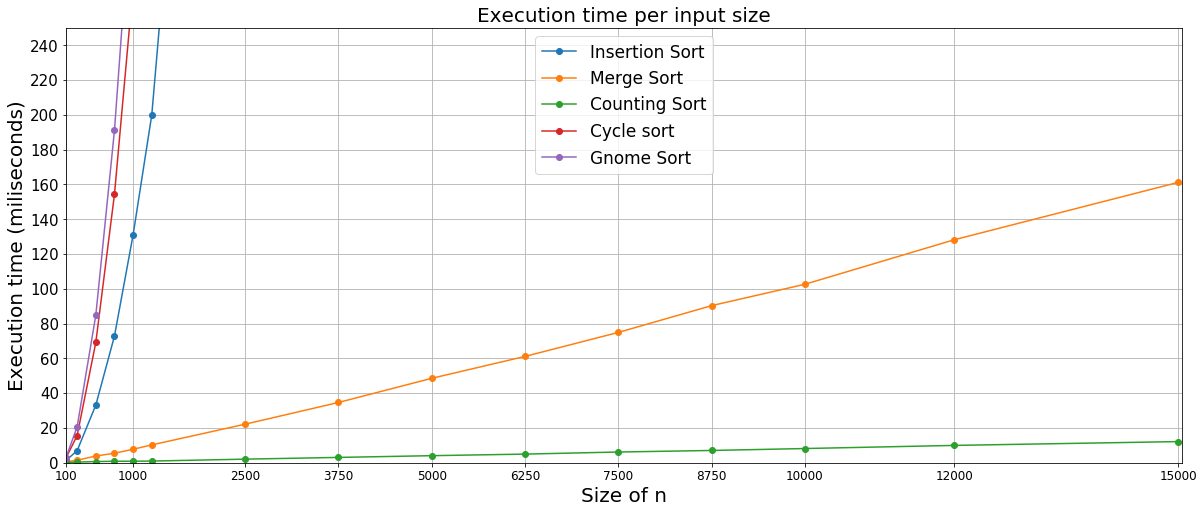

In [8]:
# PLOT general settings:
plt.figure(figsize=(20, 8)) # Set size of the plot
plt.yticks(np.arange(0, 250, step=20), fontsize=15) # Set ticks on the y axis
plt.ylim(bottom=0,top=250) # Set limit values on y axis
xtic_show=[0,4,6,7,8,9,10,11,12,13,14] # select the x ticks to show
plt.xticks(ns[xtic_show], fontsize=12) # Set x axis labels and their size
plt.xlim(left=100,right=15050) # first and last value on x axis
plt.xlabel('Size of n', fontsize=20) # x axis label
plt.ylabel('Execution time (miliseconds)', fontsize=20) # y axis label
plt.title('Execution time per input size', fontsize=20) # title of the plot

# PLOT data, overlap plot including x and y as well as adding '-o' to see lines with a dot per (x,y). Once per algorithm
plt.plot(x,y1,'-o', label='Insertion Sort') 
plt.plot(x,y2,'-o', label='Merge Sort')
plt.plot(x,y3,'-o', label='Counting Sort')
plt.plot(x,y4,'-o', label='Cycle sort')
plt.plot(x,y5,'-o', label='Gnome Sort')
plt.legend(prop={'size': 17}, loc=9) # legend size and location

plt.grid() # Add grid
plt.show()

### Visualization of every single execution time which is represented with a dot

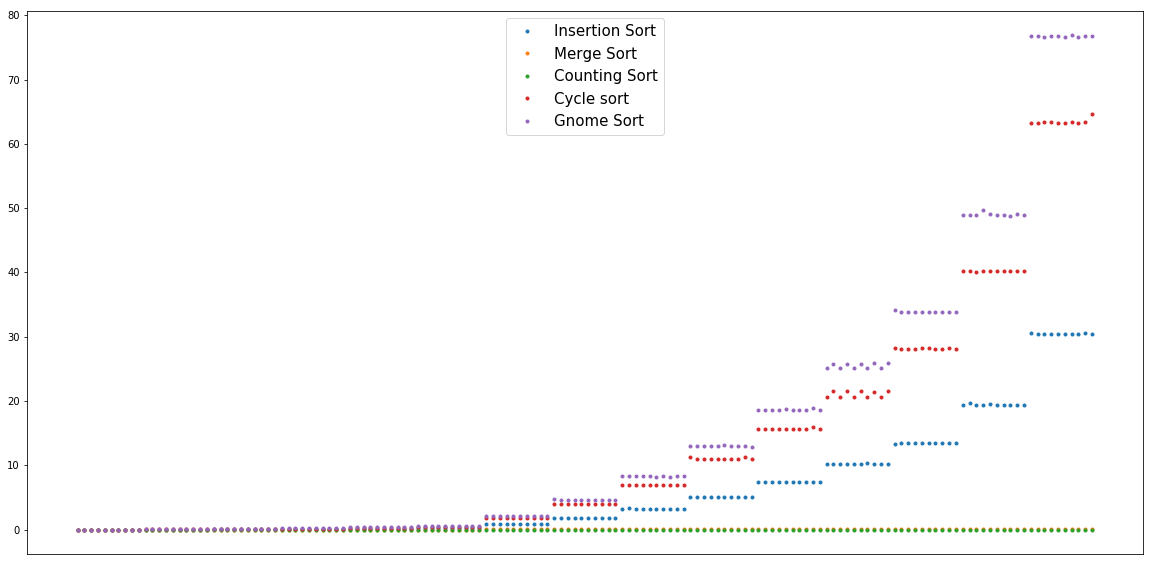

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(al1,'.', label='Insertion Sort') 
plt.plot(al2,'.', label='Merge Sort')
plt.plot(al3,'.', label='Counting Sort')
plt.plot(al4,'.', label='Cycle sort')
plt.plot(al5,'.', label='Gnome Sort')
plt.legend(prop={'size': 15}, loc=9) 
plt.xticks([]) # remove x axis labels
plt.show()

### Lowest portion of the plot focusing on the 2 fastest algorithms:

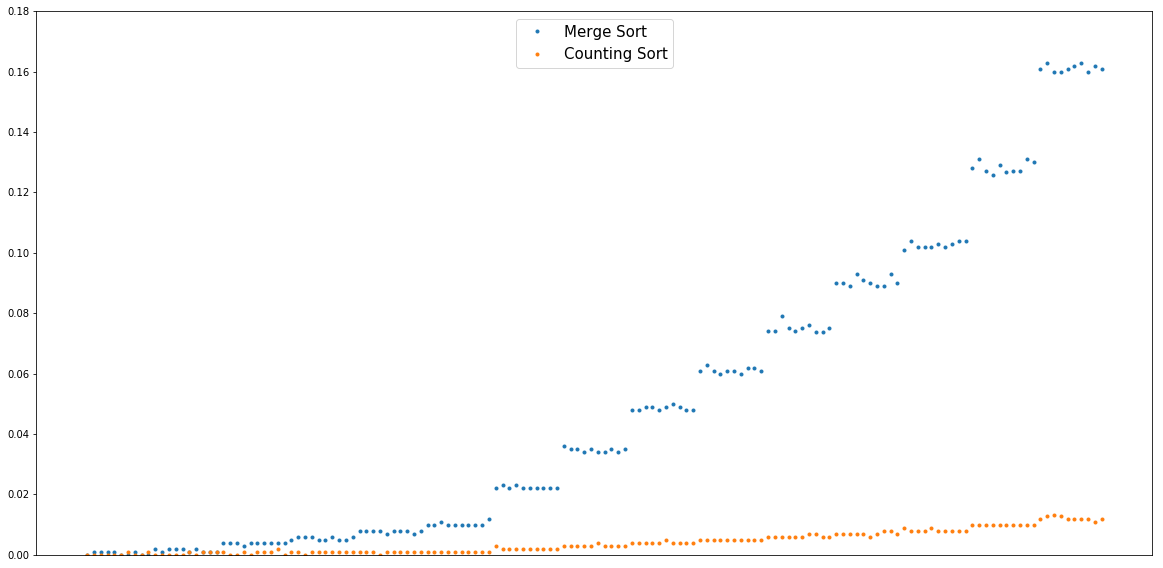

In [10]:
plt.figure(figsize=(20, 10))
plt.ylim(bottom=0,top=0.180)
plt.plot(al2,'.', label='Merge Sort')
plt.plot(al3,'.', label='Counting Sort')
plt.legend(prop={'size': 15}, loc=9) 
plt.xticks([]) # remove x axis labels
plt.show()